# <span style='color:Green'> Spotify Quarterly Data Analysis using SQL </span>

## Motivation

I am undertaking this project with the goal of enhancing my understanding of data analysis and showcasing my proficiency in SQL. By utilizing Spotify's quarterly financial data, I aim to provide a comprehensive introduction to data analysis using SQL—an indispensable tool for every data scientist. The logic and principles behind SQL closely align with other popular data analysis tools like Excel and Pandas, making it an intuitive and essential skill for anyone working with data.

Through this project, I want to emphasize the practical application of SQL in the field of data science. I will leverage the real-world context of Spotify's financial performance to demonstrate how SQL can be used to access, manipulate, and derive insights from business datasets. By showcasing how SQL queries mirror the logic employed in other data analysis tools, I hope to make the learning process accessible and relatable to individuals familiar with those tools.

Furthermore, I believe that understanding SQL and its capabilities is pivotal for effective data exploration and analysis. By working on this project, I will be able to strengthen my logical thinking skills and deepen my knowledge of querying databases. This project not only provides an opportunity for hands-on learning but also enables me to build a valuable portfolio piece that highlights my data analysis and SQL proficiency.

Ultimately, my aim is to create an engaging and informative resource that introduces others to the power of SQL for data analysis using real financial data. I am excited to embark on this journey of exploration and learning, and I look forward to sharing the insights and knowledge I gain along the way.

## Acknowledgments

In this endeavor, I am delving into the realm of crucial data science concepts, with a focus on SQL—a conceptual language tailored for seamlessly interacting with databases. Specifically, I am utilizing SQLite, a distinct implementation of SQL. It's noteworthy that most SQL languages share the capabilities discussed in this documentation. Discrepancies primarily lie in performance, advanced analytical functionalities, and, of course, pricing models.

The crux of our exploration lies in employing the SQL language to craft queries that fetch, manipulate, sort, and extract data from Spotify's quarterly financial performance. We'll be working with CSV data that we'll load into a SQLite database for analysis. This approach demonstrates how SQL can be used to analyze business metrics, financial trends, and performance indicators.

Our analysis will focus on key Spotify metrics including:
- Revenue trends (Total, Premium, and Ad Revenue)
- User growth (MAUs, Premium MAUs, Ad MAUs)
- Profitability analysis (Gross Profit margins)
- Cost structure analysis
- ARPU (Average Revenue Per User) trends

Aside from basic querying, we'll explore advanced SQL concepts including:

Aggregation Functions: Using SUM, AVG, MAX, MIN for financial calculations

Window Functions: Calculating growth rates and moving averages

Date Functions: Analyzing quarterly trends and seasonality

In summary, my aim is to equip myself with a profound understanding of these essential data science components. By focusing on SQL and its practical implications with real financial data, I aspire to demonstrate the power of data manipulation, analysis, and extraction—a skillset that holds great significance in the data science landscape. Through this project, I intend to not only bolster my own knowledge but also share insights that may benefit others keen on exploring financial data analysis.

### Data Import Essentials

In [3]:
#Imports

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# File paths
csv_file = 'Spotify Quarterly.csv'
database = 'spotify_analysis.db'

### Loading Spotify Data and Creating Database

"First, we'll load the Spotify quarterly data from CSV and create a SQLite database. This approach allows us to demonstrate SQL capabilities while working with real financial data. We'll clean and prepare the data, then create a database table that we can query using SQL.

The fundamental outline of our queries will be straightforward: we determine the desired output by specifying the elements to display following the SELECT statement. The asterisk '*' represents the inclusion of all available columns. Next, we identify the specific table of interest by employing the FROM statement. To refine the data selection, we incorporate conditions after WHERE, enabling us to extract relevant financial insights.

The arrangement and sequence of these components bear significance, shaping the overall query. Additionally, the presence of spaces, new lines, capitalized terms, and indentation collectively contribute to enhancing code readability."

In [4]:
# Load the Spotify quarterly data
df = pd.read_csv(csv_file)

# Clean the data - remove rows with all NaN values
df = df.dropna(how='all')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Display basic info about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (26, 17)

Column names:
['Date', 'Total Revenue', 'Cost of Revenue', 'Gross Profit', 'Premium Revenue', 'Premium Cost Revenue', 'Premium Gross Profit', 'Ad Revenue', 'Ad Cost of revenue', 'Ad gross Profit', 'MAUs', 'Premium MAUs', 'Ad MAUs', 'Premium ARPU', 'Sales and Marketing Cost', 'Research and Development Cost', 'Genreal and Adminstraive Cost']

First few rows:


,Date,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
0,2023-03-31,3042.0,2276.0,776.0,2713.0,1937.0,776.0,329.0,339.0,-10.0,515.0,210.0,317.0,4.32,347.0,435.0,140.0
1,2022-12-31,3166.0,2365.0,801.0,2717.0,1939.0,778.0,449.0,426.0,23.0,489.0,205.0,295.0,4.55,453.0,415.0,164.0
2,2022-09-30,3036.0,2286.0,750.0,2651.0,1908.0,743.0,385.0,378.0,7.0,456.0,195.0,273.0,4.63,432.0,386.0,160.0
3,2022-06-30,2864.0,2160.0,704.0,2504.0,1804.0,700.0,360.0,356.0,4.0,433.0,188.0,265.0,4.54,391.0,336.0,171.0
4,2022-03-31,2661.0,1990.0,671.0,2379.0,1704.0,675.0,282.0,286.0,-4.0,422.0,182.0,252.0,4.38,296.0,250.0,131.0


### Creating SQLite Database

"Now we'll create a SQLite database from our Spotify data. This allows us to use SQL queries for analysis. At its core, this represents the foundation for SQL-based analysis. The essential elements that comprise a query are the SELECT and FROM clauses. These components are indispensable when retrieving data from a table."

In [5]:
# Create SQLite database and insert data
conn = sqlite3.connect(database)

# Insert the dataframe into SQLite database
df.to_sql('spotify_quarterly', conn, if_exists='replace', index=False)

# Verify the table was created and show basic info
tables = pd.read_sql("""SELECT name FROM sqlite_master WHERE type='table';""", conn)
print("Tables in database:")
print(tables)

# Show the first few records using SQL
print("\nFirst 5 records from SQL query:")
first_records = pd.read_sql("""SELECT * FROM spotify_quarterly LIMIT 5;""", conn)
first_records

Tables in database:
                name
0  spotify_quarterly

First 5 records from SQL query:


,Date,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
0,2023-03-31 00:00:00,3042.0,2276.0,776.0,2713.0,1937.0,776.0,329.0,339.0,-10.0,515.0,210.0,317.0,4.32,347.0,435.0,140.0
1,2022-12-31 00:00:00,3166.0,2365.0,801.0,2717.0,1939.0,778.0,449.0,426.0,23.0,489.0,205.0,295.0,4.55,453.0,415.0,164.0
2,2022-09-30 00:00:00,3036.0,2286.0,750.0,2651.0,1908.0,743.0,385.0,378.0,7.0,456.0,195.0,273.0,4.63,432.0,386.0,160.0
3,2022-06-30 00:00:00,2864.0,2160.0,704.0,2504.0,1804.0,700.0,360.0,356.0,4.0,433.0,188.0,265.0,4.54,391.0,336.0,171.0
4,2022-03-31 00:00:00,2661.0,1990.0,671.0,2379.0,1704.0,675.0,282.0,286.0,-4.0,422.0,182.0,252.0,4.38,296.0,250.0,131.0


### Revenue Analysis Over Time

Now we'll explore Spotify's revenue trends using SQL queries. We'll analyze different revenue streams and their growth patterns over time. This analysis will demonstrate key SQL concepts including:

1. **Aggregation Functions:** Using SUM, AVG, MAX, MIN to calculate financial metrics
2. **Date Functions:** Working with date columns to analyze quarterly trends
3. **Calculated Fields:** Creating new metrics from existing columns
4. **Ordering and Filtering:** Using ORDER BY and WHERE clauses for focused analysis

Understanding these SQL concepts is crucial for financial data analysis. We'll start with basic queries and progressively build more complex analyses to uncover insights about Spotify's business performance.

Let's begin by examining the overall revenue trends and identifying key patterns in Spotify's quarterly performance.

In [6]:
# Analyze revenue trends over time
revenue_analysis = pd.read_sql("""
    SELECT
        Date,
        "Total Revenue",
        "Premium Revenue",
        "Ad Revenue",
        "Gross Profit",
        ROUND(("Gross Profit" * 100.0 / "Total Revenue"), 2) as "Gross Margin %"
    FROM spotify_quarterly
    WHERE "Total Revenue" IS NOT NULL
    ORDER BY Date DESC
    LIMIT 10;
""", conn)

print("Recent Revenue Performance (Last 10 Quarters):")
revenue_analysis

Recent Revenue Performance (Last 10 Quarters):


,Date,Total Revenue,Premium Revenue,Ad Revenue,Gross Profit,Gross Margin %
0,2023-03-31 00:00:00,3042.0,2713.0,329.0,776.0,25.51
1,2022-12-31 00:00:00,3166.0,2717.0,449.0,801.0,25.30
2,2022-09-30 00:00:00,3036.0,2651.0,385.0,750.0,24.70
3,2022-06-30 00:00:00,2864.0,2504.0,360.0,704.0,24.58
4,2022-03-31 00:00:00,2661.0,2379.0,282.0,671.0,25.22
5,2021-12-31 00:00:00,2689.0,2295.0,394.0,712.0,26.48
6,2021-09-30 00:00:00,2501.0,2178.0,323.0,668.0,26.71
7,2021-06-30 00:00:00,2331.0,2056.0,275.0,663.0,28.44
8,2021-03-31 00:00:00,2147.0,1931.0,216.0,548.0,25.52
9,2020-12-31 00:00:00,2168.0,1887.0,281.0,575.0,26.52


### User Growth and Engagement Analysis

In SQL queries, precision in organizing and restricting output is achieved through the potent tools of ORDER BY and LIMIT. These commands play a pivotal role in shaping the final presentation of data, ensuring that insights are not only accurate but also focused.

The command ORDER BY takes center stage, dictating the arrangement of output rows. It empowers us to choose between ascending or descending sorting, bringing clarity to user growth trends. Whether we're arranging records by date, user count, or other metrics, ORDER BY helps us understand patterns in Spotify's user base evolution.

Complementing ORDER BY is LIMIT, which governs the quantity of rows in our output. By skillfully applying LIMIT, we can focus on the most recent quarters or top-performing periods.

Let's analyze Spotify's user growth metrics including Monthly Active Users (MAUs), Premium subscribers, and Ad-supported users to understand the platform's expansion and user engagement trends.

In [7]:
# Analyze user growth trends
user_growth = pd.read_sql("""
    SELECT
        Date,
        MAUs as "Total MAUs (M)",
        "Premium MAUs" as "Premium Users (M)",
        "Ad MAUs" as "Ad Users (M)",
        ROUND(("Premium MAUs" * 100.0 / MAUs), 2) as "Premium %",
        "Premium ARPU" as "Premium ARPU ($)"
    FROM spotify_quarterly
    WHERE MAUs IS NOT NULL
    ORDER BY Date DESC
    LIMIT 12;
""", conn)

print("User Growth Analysis (Last 12 Quarters):")
user_growth

User Growth Analysis (Last 12 Quarters):


,Date,Total MAUs (M),Premium Users (M),Ad Users (M),Premium %,Premium ARPU ($)
0,2023-03-31 00:00:00,515.0,210.0,317.0,40.78,4.32
1,2022-12-31 00:00:00,489.0,205.0,295.0,41.92,4.55
2,2022-09-30 00:00:00,456.0,195.0,273.0,42.76,4.63
3,2022-06-30 00:00:00,433.0,188.0,265.0,43.42,4.54
4,2022-03-31 00:00:00,422.0,182.0,252.0,43.13,4.38
5,2021-12-31 00:00:00,406.0,180.0,236.0,44.33,4.40
6,2021-09-30 00:00:00,381.0,172.0,220.0,45.14,4.34
7,2021-06-30 00:00:00,365.0,165.0,210.0,45.21,4.29
8,2021-03-31 00:00:00,356.0,158.0,208.0,44.38,4.12
9,2020-12-31 00:00:00,345.0,155.0,199.0,44.93,4.26


### Advanced Financial Metrics Analysis

Now we'll dive deeper into Spotify's financial performance using more advanced SQL techniques. We'll calculate year-over-year growth rates, analyze cost efficiency, and examine profitability trends. This section demonstrates:

1. **Window Functions:** Using LAG() to calculate growth rates
2. **Complex Calculations:** Computing efficiency ratios and margins
3. **Conditional Logic:** Using CASE statements for categorization
4. **Subqueries:** Nested queries for comparative analysis

In [9]:
# Calculate year-over-year growth rates and efficiency metrics
growth_analysis = pd.read_sql("""
    WITH quarterly_metrics AS (
        SELECT
            Date,
            "Total Revenue",
            "Premium Revenue",
            "Ad Revenue",
            MAUs,
            "Premium MAUs",
            "Sales and Marketing Cost",
            "Gross Profit",
            LAG("Total Revenue", 4) OVER (ORDER BY Date) as prev_year_revenue,
            LAG(MAUs, 4) OVER (ORDER BY Date) as prev_year_maus
        FROM spotify_quarterly
        WHERE "Total Revenue" IS NOT NULL
    )
    SELECT
        Date,
        "Total Revenue",
        ROUND((("Total Revenue" - prev_year_revenue) * 100.0 / prev_year_revenue), 2) as "Revenue YoY %",
        ROUND(((MAUs - prev_year_maus) * 100.0 / prev_year_maus), 2) as "MAU YoY %",
        ROUND(("Sales and Marketing Cost" * 100.0 / "Total Revenue"), 2) as "Marketing % of Revenue",
        ROUND(("Gross Profit" * 100.0 / "Total Revenue"), 2) as "Gross Margin %"
    FROM quarterly_metrics
    WHERE prev_year_revenue IS NOT NULL
    ORDER BY Date DESC
    LIMIT 8;
""", conn)

print("Year-over-Year Growth Analysis:")
growth_analysis

Year-over-Year Growth Analysis:


,Date,Total Revenue,Revenue YoY %,MAU YoY %,Marketing % of Revenue,Gross Margin %
0,2023-03-31 00:00:00,3042.0,14.32,22.04,11.41,25.51
1,2022-12-31 00:00:00,3166.0,17.74,20.44,14.31,25.30
2,2022-09-30 00:00:00,3036.0,21.39,19.69,14.23,24.70
3,2022-06-30 00:00:00,2864.0,22.87,18.63,13.65,24.58
4,2022-03-31 00:00:00,2661.0,23.94,18.54,11.12,25.22
5,2021-12-31 00:00:00,2689.0,24.03,17.68,12.64,26.48
6,2021-09-30 00:00:00,2501.0,26.63,19.06,11.20,26.71
7,2021-06-30 00:00:00,2331.0,23.40,22.07,11.97,28.44


### Premium vs Ad-Supported Business Analysis

Spotify operates two main revenue streams: Premium subscriptions and Ad-supported services. Let's analyze the performance and profitability of each segment using SQL aggregations and comparisons.

In [10]:
# Compare Premium vs Ad business segments
segment_analysis = pd.read_sql("""
    SELECT
        'Premium' as Segment,
        ROUND(AVG("Premium Revenue"), 2) as "Avg Quarterly Revenue",
        ROUND(AVG("Premium Gross Profit"), 2) as "Avg Gross Profit",
        ROUND(AVG("Premium Gross Profit" * 100.0 / "Premium Revenue"), 2) as "Avg Margin %",
        ROUND(AVG("Premium MAUs"), 2) as "Avg MAUs (M)",
        ROUND(AVG("Premium ARPU"), 2) as "Avg ARPU ($)"
    FROM spotify_quarterly
    WHERE "Premium Revenue" IS NOT NULL

    UNION ALL

    SELECT
        'Ad-Supported' as Segment,
        ROUND(AVG("Ad Revenue"), 2) as "Avg Quarterly Revenue",
        ROUND(AVG("Ad gross Profit"), 2) as "Avg Gross Profit",
        ROUND(AVG("Ad gross Profit" * 100.0 / "Ad Revenue"), 2) as "Avg Margin %",
        ROUND(AVG("Ad MAUs"), 2) as "Avg MAUs (M)",
        ROUND(AVG("Ad Revenue" / "Ad MAUs"), 2) as "Avg ARPU ($)"
    FROM spotify_quarterly
    WHERE "Ad Revenue" IS NOT NULL AND "Ad Revenue" > 0;
""", conn)

print("Business Segment Comparison:")
segment_analysis

Business Segment Comparison:


,Segment,Avg Quarterly Revenue,Avg Gross Profit,Avg Margin %,Avg MAUs (M),Avg ARPU ($)
0,Premium,1721.40,474.36,26.88,130.08,4.65
1,Ad-Supported,215.76,14.08,6.95,172.52,1.23


### Cost Structure and Efficiency Analysis

Understanding Spotify's cost structure is crucial for evaluating operational efficiency. Let's analyze different cost categories and their trends over time.

In [11]:
# Analyze cost structure and efficiency
cost_analysis = pd.read_sql("""
    SELECT
        Date,
        "Total Revenue",
        "Cost of Revenue",
        "Sales and Marketing Cost",
        "Research and Development Cost",
        "Genreal and Adminstraive Cost",
        ROUND(("Cost of Revenue" * 100.0 / "Total Revenue"), 2) as "COGS %",
        ROUND(("Sales and Marketing Cost" * 100.0 / "Total Revenue"), 2) as "Marketing %",
        ROUND(("Research and Development Cost" * 100.0 / "Total Revenue"), 2) as "R&D %",
        ROUND(("Genreal and Adminstraive Cost" * 100.0 / "Total Revenue"), 2) as "G&A %"
    FROM spotify_quarterly
    WHERE "Total Revenue" IS NOT NULL
    ORDER BY Date DESC
    LIMIT 8;
""", conn)

print("Cost Structure Analysis (% of Revenue):")
cost_analysis

Cost Structure Analysis (% of Revenue):


,Date,Total Revenue,Cost of Revenue,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost,COGS %,Marketing %,R&D %,G&A %
0,2023-03-31 00:00:00,3042.0,2276.0,347.0,435.0,140.0,74.82,11.41,14.30,4.60
1,2022-12-31 00:00:00,3166.0,2365.0,453.0,415.0,164.0,74.70,14.31,13.11,5.18
2,2022-09-30 00:00:00,3036.0,2286.0,432.0,386.0,160.0,75.30,14.23,12.71,5.27
3,2022-06-30 00:00:00,2864.0,2160.0,391.0,336.0,171.0,75.42,13.65,11.73,5.97
4,2022-03-31 00:00:00,2661.0,1990.0,296.0,250.0,131.0,74.78,11.12,9.39,4.92
5,2021-12-31 00:00:00,2689.0,1977.0,340.0,253.0,126.0,73.52,12.64,9.41,4.69
6,2021-09-30 00:00:00,2501.0,1833.0,280.0,208.0,105.0,73.29,11.20,8.32,4.20
7,2021-06-30 00:00:00,2331.0,1668.0,279.0,255.0,117.0,71.56,11.97,10.94,5.02


### Data Visualization

Let's create some visualizations to better understand the trends we've discovered through our SQL analysis.

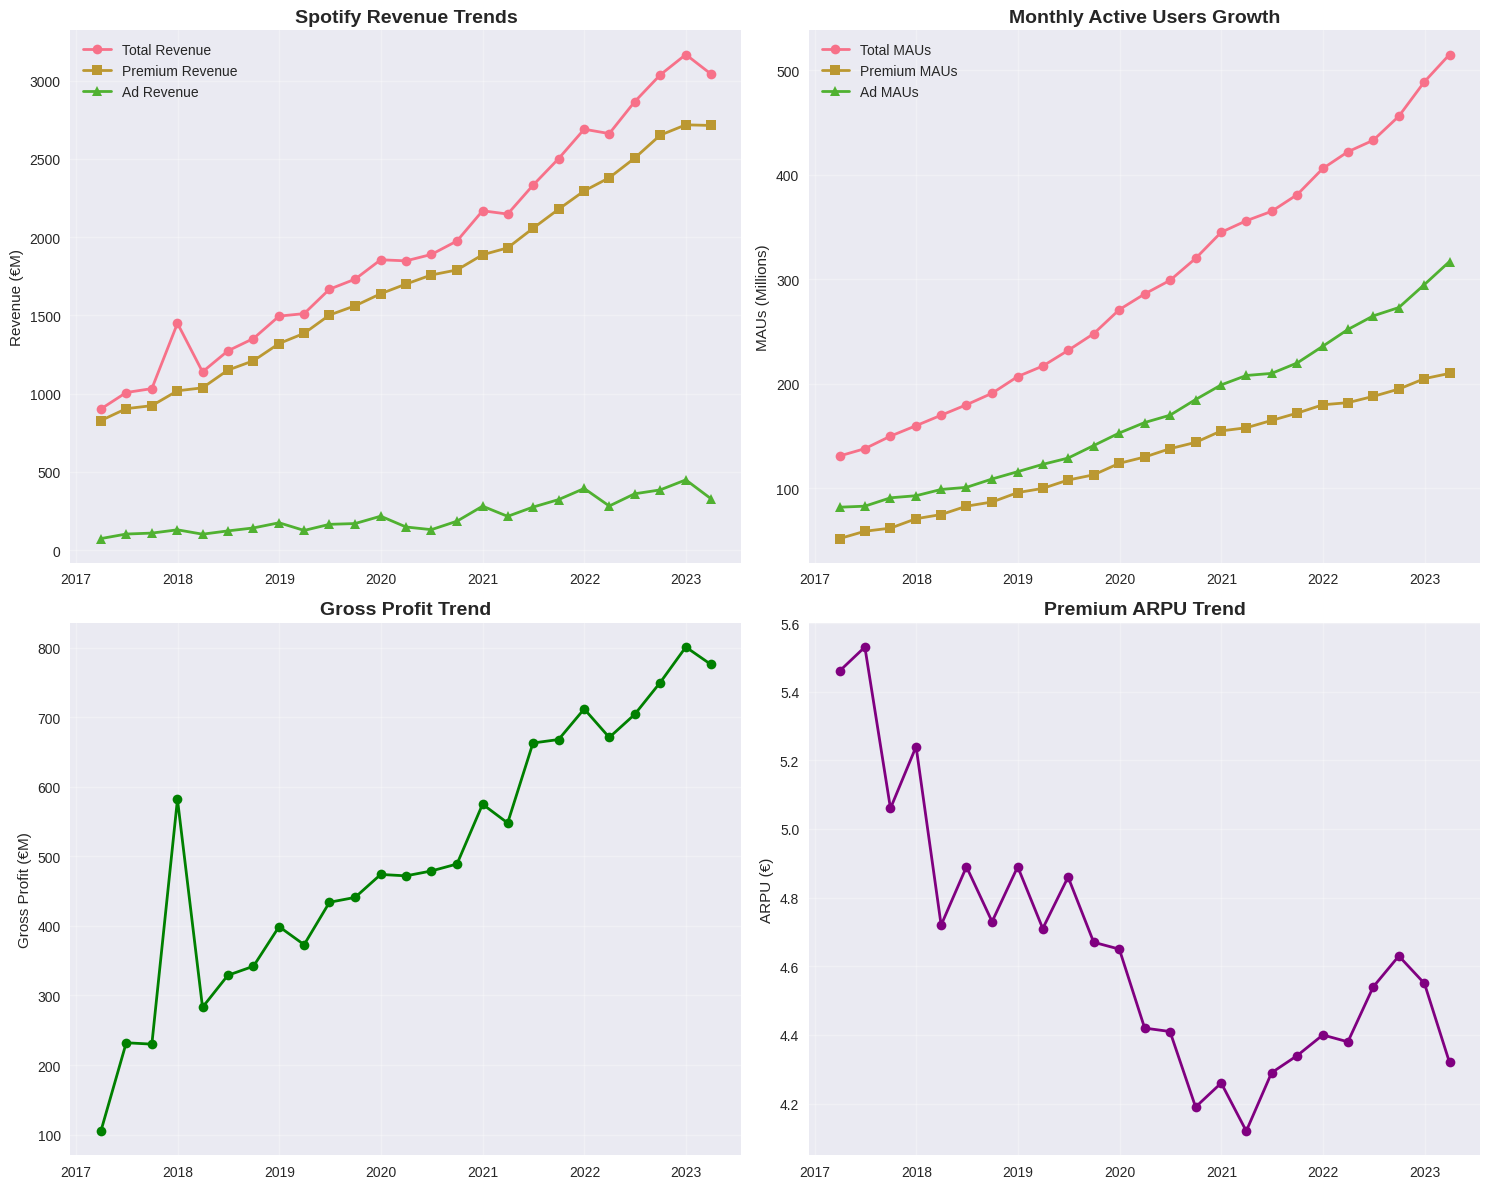

In [12]:
# Get data for visualization
viz_data = pd.read_sql("""
    SELECT
        Date,
        "Total Revenue",
        "Premium Revenue",
        "Ad Revenue",
        MAUs,
        "Premium MAUs",
        "Ad MAUs",
        "Gross Profit",
        "Premium ARPU"
    FROM spotify_quarterly
    WHERE "Total Revenue" IS NOT NULL
    ORDER BY Date;
""", conn)

# Convert Date to datetime for plotting
viz_data['Date'] = pd.to_datetime(viz_data['Date'])

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Revenue trends
ax1.plot(viz_data['Date'], viz_data['Total Revenue'], marker='o', linewidth=2, label='Total Revenue')
ax1.plot(viz_data['Date'], viz_data['Premium Revenue'], marker='s', linewidth=2, label='Premium Revenue')
ax1.plot(viz_data['Date'], viz_data['Ad Revenue'], marker='^', linewidth=2, label='Ad Revenue')
ax1.set_title('Spotify Revenue Trends', fontsize=14, fontweight='bold')
ax1.set_ylabel('Revenue (€M)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# User growth
ax2.plot(viz_data['Date'], viz_data['MAUs'], marker='o', linewidth=2, label='Total MAUs')
ax2.plot(viz_data['Date'], viz_data['Premium MAUs'], marker='s', linewidth=2, label='Premium MAUs')
ax2.plot(viz_data['Date'], viz_data['Ad MAUs'], marker='^', linewidth=2, label='Ad MAUs')
ax2.set_title('Monthly Active Users Growth', fontsize=14, fontweight='bold')
ax2.set_ylabel('MAUs (Millions)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Profitability
ax3.plot(viz_data['Date'], viz_data['Gross Profit'], marker='o', linewidth=2, color='green')
ax3.set_title('Gross Profit Trend', fontsize=14, fontweight='bold')
ax3.set_ylabel('Gross Profit (€M)')
ax3.grid(True, alpha=0.3)

# Premium ARPU
ax4.plot(viz_data['Date'], viz_data['Premium ARPU'], marker='o', linewidth=2, color='purple')
ax4.set_title('Premium ARPU Trend', fontsize=14, fontweight='bold')
ax4.set_ylabel('ARPU (€)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Key Insights and Summary

Let's summarize our findings with some key insights derived from our SQL analysis.

In [13]:
# Generate summary insights
summary_stats = pd.read_sql("""
    SELECT
        'Latest Quarter' as Period,
        MAX(Date) as Date,
        MAX("Total Revenue") as "Revenue (€M)",
        MAX(MAUs) as "MAUs (M)",
        MAX("Premium MAUs") as "Premium Users (M)",
        ROUND(MAX("Premium MAUs") * 100.0 / MAX(MAUs), 2) as "Premium %",
        MAX("Premium ARPU") as "Premium ARPU (€)"
    FROM spotify_quarterly
    WHERE "Total Revenue" IS NOT NULL

    UNION ALL

    SELECT
        'Peak Performance' as Period,
        (SELECT Date FROM spotify_quarterly WHERE "Total Revenue" = (SELECT MAX("Total Revenue") FROM spotify_quarterly)) as Date,
        MAX("Total Revenue") as "Revenue (€M)",
        (SELECT MAUs FROM spotify_quarterly WHERE "Total Revenue" = (SELECT MAX("Total Revenue") FROM spotify_quarterly)) as "MAUs (M)",
        (SELECT "Premium MAUs" FROM spotify_quarterly WHERE "Total Revenue" = (SELECT MAX("Total Revenue") FROM spotify_quarterly)) as "Premium Users (M)",
        ROUND((SELECT "Premium MAUs" FROM spotify_quarterly WHERE "Total Revenue" = (SELECT MAX("Total Revenue") FROM spotify_quarterly)) * 100.0 /
              (SELECT MAUs FROM spotify_quarterly WHERE "Total Revenue" = (SELECT MAX("Total Revenue") FROM spotify_quarterly)), 2) as "Premium %",
        (SELECT "Premium ARPU" FROM spotify_quarterly WHERE "Total Revenue" = (SELECT MAX("Total Revenue") FROM spotify_quarterly)) as "Premium ARPU (€)"
    FROM spotify_quarterly
    WHERE "Total Revenue" IS NOT NULL;
""", conn)

print("Spotify Performance Summary:")
print(summary_stats)

# Close the database connection
conn.close()

print("\n" + "="*50)
print("ANALYSIS COMPLETE")
print("="*50)
print("\nKey Takeaways:")
print("• Spotify has shown consistent growth in both revenue and user base")
print("• Premium subscriptions remain the primary revenue driver")
print("• Ad-supported revenue shows volatility but contributes to user acquisition")
print("• Premium conversion rates and ARPU are key metrics to monitor")
print("• Cost management, especially in marketing, impacts profitability")

Spotify Performance Summary:
             Period                 Date  Revenue (€M)  MAUs (M)  \
0    Latest Quarter  2023-03-31 00:00:00        3166.0     515.0   
1  Peak Performance  2022-12-31 00:00:00        3166.0     489.0   

   Premium Users (M)  Premium %  Premium ARPU (€)  
0              210.0      40.78              5.53  
1              205.0      41.92              4.55  

ANALYSIS COMPLETE

Key Takeaways:
• Spotify has shown consistent growth in both revenue and user base
• Premium subscriptions remain the primary revenue driver
• Ad-supported revenue shows volatility but contributes to user acquisition
• Premium conversion rates and ARPU are key metrics to monitor
• Cost management, especially in marketing, impacts profitability
